# Homework 4
## Kyle Hadley

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
import warnings
warnings.simplefilter('ignore')

## 1. Quadratic Functions

Given $f(x) = \frac{1}{2}x^TQx + c^Tx$.

### (a)

In order to re-write $f(x)$ in the form $f(x) = \frac{1}{2}(x - x_c)^TQ(x-x_c) + \text{CONST}$, we must solve for $x_c$ and our $\text{CONST}$. To do this, we can equate our initial $f(x)$ with the new form such that

$$f(x) = \frac{1}{2}x^TQx + c^Tx= \frac{1}{2}(x - x_c)^TQ(x-x_c) + \text{CONST}$$

We can expand the right side of our equality such that

$$\frac{1}{2}x^TQx + c^Tx= \frac{1}{2}x^TQx - x_c^TQx + \frac{1}{2}x_c^TQx_c + \text{CONST}$$
$$c^Tx= - x_c^TQx + \frac{1}{2}x_c^TQx_c + \text{CONST}$$


From this equality we can see that

$$c^Tx = - x_c^TQx$$

thus, solving for $x_c$ we find

$$x_c^T = -c^TQ^{-1}$$

In addition, from our previous equality we can see that

$$\text{CONST} = -\frac{1}{2}x_c^TQx_c$$

Thus, we can re-write our $f(x)$ in the form $f(x) = \frac{1}{2}(x - x_c)^TQ(x-x_c) + \text{CONST}$ such that $x_c^T = -c^TQ^{-1}$ and $\text{CONST} = -\frac{1}{2}x_c^TQx_c$.

### (b)

First, we can calculate the derivative of the first form of our $f(x)$ where $f(x) =\frac{1}{2}x^TQx + c^Tx$. Calculating the deriviative we find,

$$\frac{\partial f}{\partial x} = x^TQ + c^T$$

for the first form of $f(x)$.

Second, we can calculate the deriviative of the second form of our $f(x)$ where $f(x) = \frac{1}{2}(x - x_c)^TQ(x-x_c) + \text{CONST}$ given our previously calculated values for $\text{CONST}$ and $x_c$. Expanding the form of $f(x)$ such that

$$\frac{1}{2}x^TQx - x_c^TQx + \frac{1}{2}x_c^TQx_c + \text{CONST}$$

Calculating the derivative - using the expanded form - we find,

$$\frac{\partial f}{\partial x} = x^TQ - x_c^TQ$$

Substituting for $x_c = -c^TQ^{-1}$,

$$\frac{\partial f}{\partial x} = x^TQ - (-c^TQ^{-1})Q$$
$$\frac{\partial f}{\partial x} = x^TQ + c^T$$

Thus we can see that the derivative of $f(x)$ is equivalent when using either form.

## 2. Minimum Norm Problem

Given $\min\limits_{x \in \mathbb{R}^n} f(x) = \frac{1}{2}|x|^2_2 = \frac{1}{2}x^Tx$ such that $Ax = b$. The optimality conditions are $\frac{\partial f}{\partial x}^T = x = -A^Tv$ and $Ax = b$.

### (a)

To solve for $v^*$ in terms of $b$, we first start by multiplying our 1st optimality condition by the value of $A$ such that

$$Ax = A(-A^Tv)$$

Substituting our second optimality condition $Ax = b$,

$$b = -AA^Tv^*$$
$$v^* = -(AA^T)^{-1}b$$

### (b)

To solve for $x^*$ in terms of $b$, we can substitute our relationship for $v^*$ into our first optimality condition such that

$$x^* = -A^Tv^*$$
$$x^* = A^T(AA^T)^{-1}b$$

### (c)

Given $x^* = \begin{bmatrix}A^T & N\end{bmatrix} z^*$, we can solve for the terms of $z^*$ as follows.

$$x^* = \begin{bmatrix}A^T & N\end{bmatrix} z^*$$
$$\begin{bmatrix}A^T & N\end{bmatrix}^{-1}x^* = z^*$$

Using the inverse as calculated in problem 3 of HW 2, we find that

$$z^*_1 = (AA^T)^{-1}A x^*$$
$$z^*_2 = (N^TN)^{-1}N^T x^*$$


### (d)

Given $A = \begin{bmatrix} 1 & 1\end{bmatrix}$ and $b=1$, we can draw a picture of the optimization space as shown below.

Note: $x^*$ and $-A^Tv*$ are located at the same point $[\frac{1}{2}, \frac{1}{2}]$.

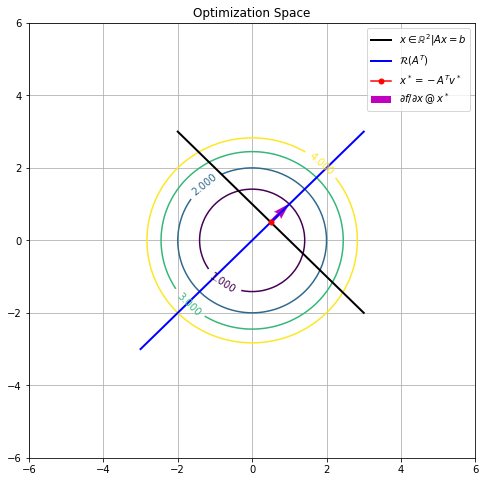

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot space of x such that Ax = b
ax.plot([-2, 0, 1, 3], [3, 1, 0, -2], color='k', label='${x \in \mathbb{R}^2 | Ax=b}$', linewidth=2)

# Plot Range of A^T
ax.plot([-3, 3], [-3, 3], color='b', label='$\mathcal{R}(A^T)$', linewidth=2)

# Plot x* and -A^Tv*
ax.plot([1/2], [1/2], color='r', label='$x^* = -A^Tv^*$', marker='.', markersize=10)

# Plot level sets (ellipses in this case)
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)

F = 1/2*X**2 + 1/2*Y**2
CS = ax.contour(X, Y, F, [1, 2, 3, 4])
ax.clabel(CS, inline=1, fontsize=10)

# Plot df/dx at x*
ax.quiver([1/2], [1/2], [1/2], [1/2], color='m', scale=12, label='$\partial f / \partial x \: @ \: x^*$')

ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.grid()
ax.legend()
ax.set_title('Optimization Space')

plt.show()

## 3. Spherical Level Sets

Given $\min\limits_{x \in \mathbb{R}^n} f(x) = \frac{1}{2}|x|^2_2 + c^Tx= \frac{1}{2}x^Tx + c^Tx$ such that $Ax = b$. The optimality conditions are $\frac{\partial f}{\partial x}^T = x + c= -A^Tv$ and $Ax = b$.

### (a)

To solve for $v^*$ in terms of $b$, we first start by multiplying our 1st optimality condition by the value of $A$ such that

$$A(x + c) = A(-A^Tv)$$
$$Ax + Ac = -AA^Tv$$

Substituting our second optimality condition $Ax = b$,

$$b + Ac = -AA^Tv^*$$
$$v^* = -(AA^T)^{-1}(b + Ac)$$

To solve for $x^*$ in terms of $b$, we can substitute our relationship for $v^*$ into our first optimality condition such that

$$x^* + c = -A^Tv^*$$
$$x^* = A^T(AA^T)^{-1}(b + Ac) - c$$
$$x^* = A^T(AA^T)^{-1}b + AA^T(AA^T)^{-1}c - c$$
$$x^* = A^T(AA^T)^{-1}b + c - c$$
$$x^* = A^T(AA^T)^{-1}b$$

### (b)

In order to re-write the objective function in the form of $f(x) = \frac{1}{2}z^Tz + \text{CONST}$, we must solve for the $\bar{x}$ and $\text{CONST}$. To do this, we can equate our initial $f(x)$ with the new form such that

$$f(x) = \frac{1}{2}x^Tx + c^Tx = \frac{1}{2}z^Tz + \text{CONST}$$

where $z = x - \bar{x}$. If we subsitute in this relationship and expand, we find that

$$\frac{1}{2}x^Tx + c^Tx = \frac{1}{2}x^Tx - \bar{x}^Tx + \frac{1}{2}\bar{x}^T\bar{x} + \text{CONST}$$
$$c^Tx = - \bar{x}^Tx + \frac{1}{2}\bar{x}^T\bar{x} + \text{CONST}$$

From this inequality, we can see that that

$$c^Tx = - \bar{x}^Tx$$

thus, solving for $\bar{x}$ we find

$$\bar{x}^T = -c^T$$

In addition, from our previous equality we can see that

$$\text{CONST} = -\frac{1}{2}\bar{x}^T\bar{x}$$

Thus, we can $f(x)$ in the form $f(x) = \frac{1}{2}z^Tz + \text{CONST}$ such that $\bar{x}^T = -c^T$ and $\text{CONST} = -\frac{1}{2}\bar{x}^T\bar{x}$.

Computing $\bar{b}$,

$$\bar{b} = Az = A(x-\bar{x})$$
$$\bar{b} = b-A\bar{x}$$

where $\bar{x}$ has been previously defined.

### (c)

Solving for $z^*$ given $x^*$,

$$z^* = x^* - \bar{x} = A^T(AA^T)^{-1}b - \bar{x}$$

Now substituting our relationship for $\bar{b}$ where $b = \bar{b} + A\bar{x}$,

$$z^* = A^T(AA^T)^{-1}(\bar{b} + A\bar{x}) - \bar{x}$$
$$z^* = A^T(AA^T)^{-1}\bar{b} + AA^T(AA^T)^{-1}\bar{x} - \bar{x}$$
$$z^* = A^T(AA^T)^{-1}\bar{b} + \bar{x} - \bar{x}$$
$$z^* = A^T(AA^T)^{-1}\bar{b}$$

Thus, we can see that $z^* = x^* - \bar{x} = A^T(AA^T)^{-1}\bar{b}$.

### (d) and (e)

Given $A = \begin{bmatrix} 1 & 1\end{bmatrix}$, $b=1$, and $c^T = \begin{bmatrix} -1 & 1 \end{bmatrix}$, we can draw a picture of the optimization space as shown below.



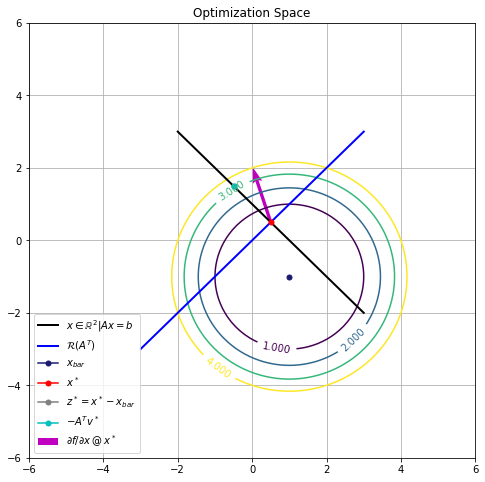

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot space of x such that Ax = b
ax.plot([-2, 0, 1, 3], [3, 1, 0, -2], color='k', label='${x \in \mathbb{R}^2 | Ax=b}$', linewidth=2)

# Plot Range of A^T
ax.plot([-3, 3], [-3, 3], color='b', label='$\mathcal{R}(A^T)$', linewidth=2)

# Plot level sets (ellipses in this case)
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)

F = 1/2*X**2 + 1/2*Y**2- X + Y
CS = ax.contour(X, Y, F, [1, 2, 3, 4])
ax.clabel(CS, inline=1, fontsize=10)

# Plot x_bar
origin = [1, -1]
ax.plot(origin[0], origin[1], color='midnightblue', label='$x_{bar}$', marker='.', markersize=10)

# Plot x*
ax.plot([1/2], [1/2], color='r', label='$x^*$', marker='.', markersize=10)

# Plot z*
ax.plot([1/2 - origin[0]], [1/2 - origin[1]], color='grey', label='$z^* = x^* - x_{bar}$', marker='.', markersize=10)

# Plot -A^Tv*
ax.plot([-1/2], [3/2], color='c', label='$-A^Tv^*$', marker='.', markersize=10)

# Plot df/dx at x*
ax.quiver([1/2], [1/2], [-1/2], [3/2], color='m', scale=12, label='$\partial f / \partial x \: @ \: x^*$')

ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.grid()
ax.legend(loc='lower left')
ax.set_title('Optimization Space')

plt.show()

## 4. Ellipsoidal Level Sets

Given $\min\limits_{x \in \mathbb{R}^n} f(x) = \frac{1}{2}x^TQx + c^Tx$ such that $Ax = b$. The optimality conditions are $\frac{\partial f}{\partial x}^T = Qx + c= -A^Tv$ and $Ax = b$.

### (a)

To solve for $v^*$ in terms of $b$, we first start by multiplying our 1st optimality condition by the value of $AQ^{-1}$ such that

$$AQ^{-1}(Qx + c) = AQ^{-1}(-A^Tv)$$
$$AQ^{-1}Qx + AQ^{-1}c = -AQ^{-1}A^Tv$$
$$Ax + AQ^{-1}c = -AQ^{-1}A^Tv$$

Substituting our second optimality condition $Ax = b$,

$$b + AQ^{-1}c = -AQ^{-1}A^Tv$$
$$v^* = (-AQ^{-1}A^T)^{-1}(b + AQ^{-1}c)$$

To solve for $x^*$ in terms of $b$, we can substitute our relationship for $v^*$ into our first optimality condition such that

$$Qx^* + c = -A^Tv^*$$
$$x^* = -A^T(-AQ^{-1}A^T)^{-1}(b + AQ^{-1}c) - c$$
$$x^* = A^T(AQ^{-1}A^T)^{-1}b + (AQ^{-1}A^T)^{-1}A^TAQ^{-1}c - c$$
$$x^* = A^T(AQ^{-1}A^T)^{-1}b + c - c$$
$$x^* = A^T(AQ^{-1}A^T)^{-1}b$$


### (b)

Rewriting the optimization problem such that $x = Q^{-\frac{1}{2}}x'$

$$\min\limits_{x' \in \mathbb{R}^n} f(x') = \frac{1}{2}x'^Tx' + c^TQ^{-\frac{1}{2}}x'$$
such that
$$AQ^{-\frac{1}{2}}x' = b$$

The optimality condition is then given as

$$\frac{\partial f}{\partial x'}^T = x' + c = -A^Tv'$$

and

$$AQ^{-\frac{1}{2}}x' = b$$

### (c)

Re-solving the optimization problem in the $x'$ coordinates (and then transforming our solution back to the $x$ coordinates), we first left multiply our first optimality condition by $AQ^{-\frac{1}{2}}$ such that

$$AQ^{-\frac{1}{2}}(x' + c) = -AQ^{-\frac{1}{2}}A^Tv'$$
$$AQ^{-\frac{1}{2}}x' + AQ^{-\frac{1}{2}}c = -AQ^{-\frac{1}{2}}A^Tv'$$
$$b + AQ^{-\frac{1}{2}}c = -AQ^{-\frac{1}{2}}A^Tv'$$

Solving for $v'^*$

$$v'^* = (-AQ^{-\frac{1}{2}}A^T)^{-1}(b + AQ^{-\frac{1}{2}}c)$$

To solve for $x^*$ in terms of $b$, we can substitute our relationship for $v^*$ into our first optimality condition such that

$$x'^* + c = -A^Tv'^*$$
$$x'^* = A^T(AQ^{-\frac{1}{2}}A^T)^{-1}(b + AQ^{-\frac{1}{2}}c) -c$$
$$x'^* = A^T(AQ^{-\frac{1}{2}}A^T)^{-1}b + AQ^{-\frac{1}{2}}A^T(AQ^{-\frac{1}{2}}A^T)^{-1}c -c$$
$$x'^* = A^T(AQ^{-\frac{1}{2}}A^T)^{-1}b + c -c$$
$$x'^* = A^T(AQ^{-\frac{1}{2}}A^T)^{-1}b$$

If we now substitute our relationship for $x' = Q^{\frac{1}{2}}x$,

$$Q^{\frac{1}{2}}x^* = A^T(AQ^{-\frac{1}{2}}A^T)^{-1}b$$

### (d)

Given $Q = \begin{bmatrix} 2 & 0 \\ 0 & 1\end{bmatrix}$, $A = \begin{bmatrix} 1 & 1\end{bmatrix}$, $b=1$, and $c^T = \begin{bmatrix} -1 & 1 \end{bmatrix}$, we can solve for the center of ellipsoidal $\bar{x}$ using the previous relationship we derived in problem 3.

From problem 3, we know that

$$\bar{x'}^T = -c^T = -\begin{bmatrix} -1 & 1 \end{bmatrix}$$

Thus we find $\bar{x'} = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$. We can now transform this point back into the x coordinates using our relationship $x = Q^{-\frac{1}{2}}x'$.

$$\bar{x} = Q^{-\frac{1}{2}}\bar{x'}$$
$$\bar{x} = \begin{bmatrix} 2 & 0 \\ 0 & 1\end{bmatrix}^{-\frac{1}{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix}$$

Solving for $\bar{x}$,

$$\bar{x} = \begin{bmatrix} \frac{\sqrt{2}}{2} \\ -1 \end{bmatrix}$$

### (e)

Using previously defined values for $Q$, $A$, $b$, and $c^T$, we can draw a picture of the optimization space as shown below.

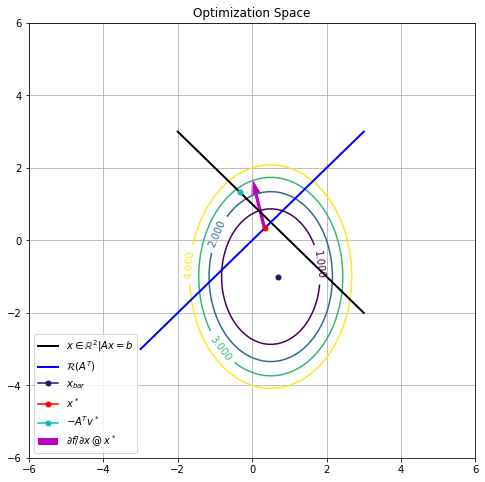

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot space of x such that Ax = b
ax.plot([-2, 0, 1, 3], [3, 1, 0, -2], color='k', label='${x \in \mathbb{R}^2 | Ax=b}$', linewidth=2)

# Plot Range of A^T
ax.plot([-3, 3], [-3, 3], color='b', label='$\mathcal{R}(A^T)$', linewidth=2)

# Plot level sets (ellipses in this case)
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)

F = X**2 + 1/2*Y**2 - X + Y
CS = ax.contour(X, Y, F, [1, 2, 3, 4])
ax.clabel(CS, inline=1, fontsize=10)

# Plot x_bar
origin = [np.sqrt(2)/2, -1]
ax.plot(origin[0], origin[1], color='midnightblue', label='$x_{bar}$', marker='.', markersize=10)

# Plot x*
ax.plot([1/3], [1/3], color='r', label='$x^*$', marker='.', markersize=10)

# Plot -A^Tv*
ax.plot([-1/3], [4/3], color='c', label='$-A^Tv^*$', marker='.', markersize=10)

# Plot df/dx at x*
ax.quiver([1/3], [1/3], [-1/3], [4/3], color='m', scale=12, label='$\partial f / \partial x \: @ \: x^*$')

ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.grid()
ax.legend(loc='lower left')
ax.set_title('Optimization Space')

plt.show()